In [1]:
# The pip install can take a minute
#%pip install -q urllib3<2.0 datascience ipywidgets
#import pyodide_http
#pyodide_http.patch_all()

# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

### Regression line vs other lines

In [2]:
def standard_units(arr):
    """ Converts an array to standard units """
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    """ Computes correlation: t is a table, and x and y are column names """
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates (predictions) at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

## Residuals

In [3]:
demographics = Table.read_table('district_demographics2016.csv')
demographics = demographics.drop(
    'State', 'District', 'Percent voting for Clinton')
demographics.show(5)

Median Income,College%
47083,24
42035,21.8
46544,22.8
41110,17
51690,30.3


In [4]:
def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

In [5]:
demographics = demographics.with_columns(
    'Fitted Value', fitted_values(demographics, 'College%', 'Median Income'),
    'Residual', residuals(demographics, 'College%', 'Median Income')
)
demographics

Median Income,College%,Fitted Value,Residual
47083,24,51299.4,-4216.42
42035,21.8,48503.9,-6468.87
46544,22.8,49774.6,-3230.58
41110,17,42404.5,-1294.51
51690,30.3,59304.8,-7614.84
61413,36.7,67437.3,-6024.33
34664,19.4,45454.2,-10790.2
76440,29.6,58415.3,18024.7
50537,24.5,51934.8,-1397.77
49072,34,64006.4,-14934.4


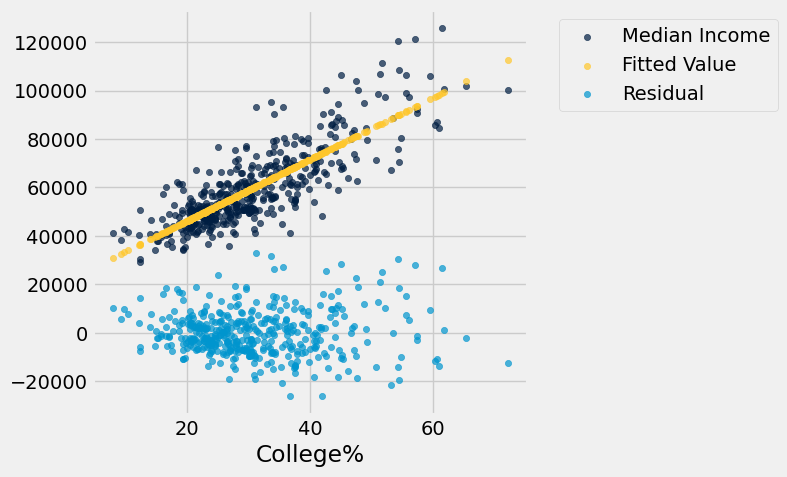

In [6]:
demographics.scatter('College%')

In [7]:
def plot_residuals(t, x, y):
    tbl = t.with_columns(
        'Fitted', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    tbl.select(x, y, 'Fitted').scatter(0)
    tbl.scatter(x, 'Residual')

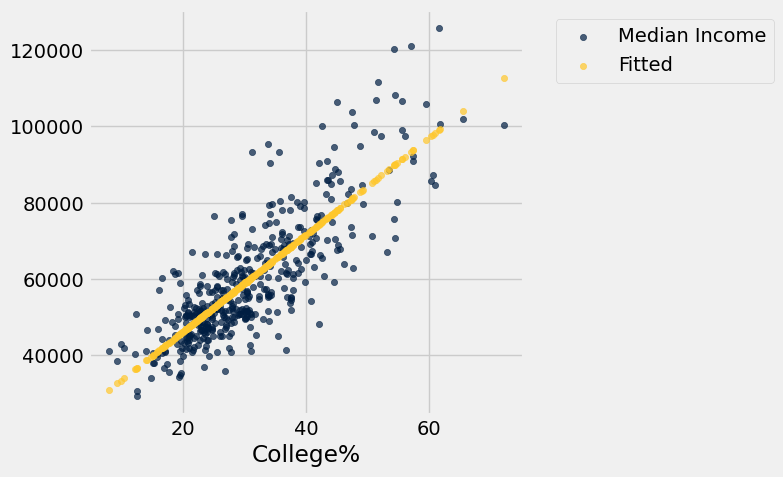

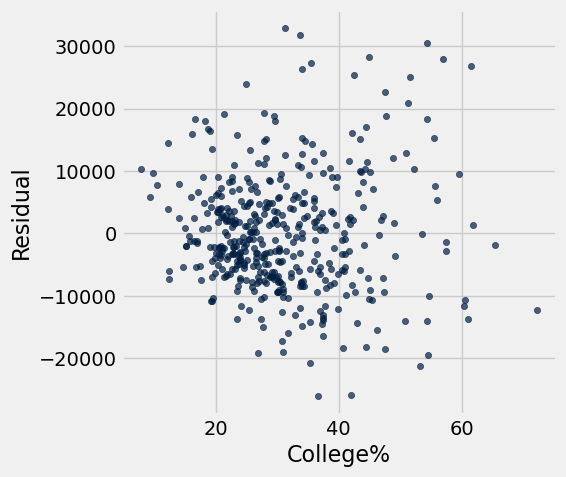

In [8]:
plot_residuals(demographics, 'College%', 'Median Income')

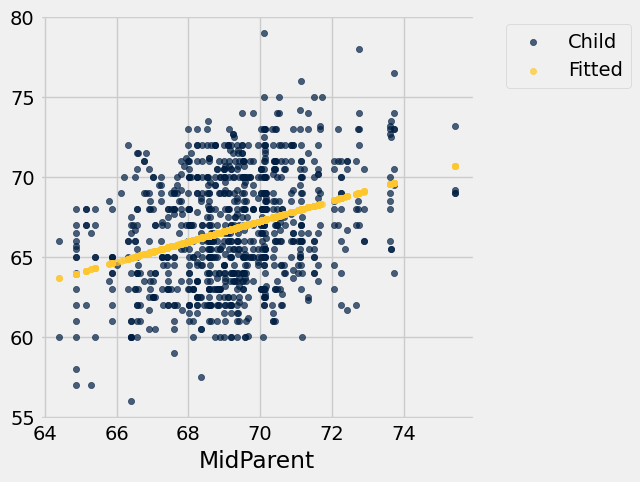

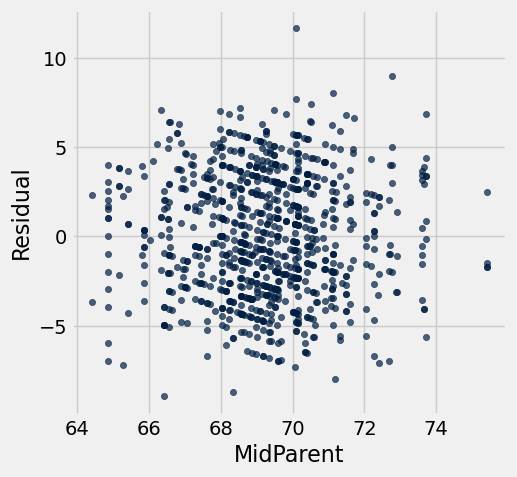

In [9]:
galton = Table.read_table('heights.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )
plot_residuals(heights, 'MidParent', 'Child')

## Dugongs ##

In [10]:
dugong = Table.read_table('dugong.csv')
dugong.show(5)

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5


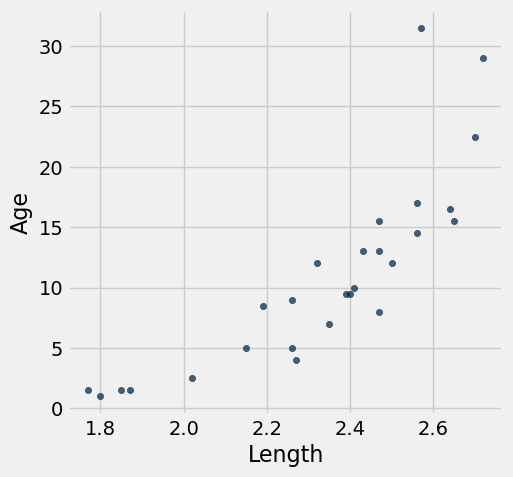

In [11]:
dugong.scatter('Length', 'Age')

In [12]:
correlation(dugong, 'Length', 'Age')

0.82964745549057139

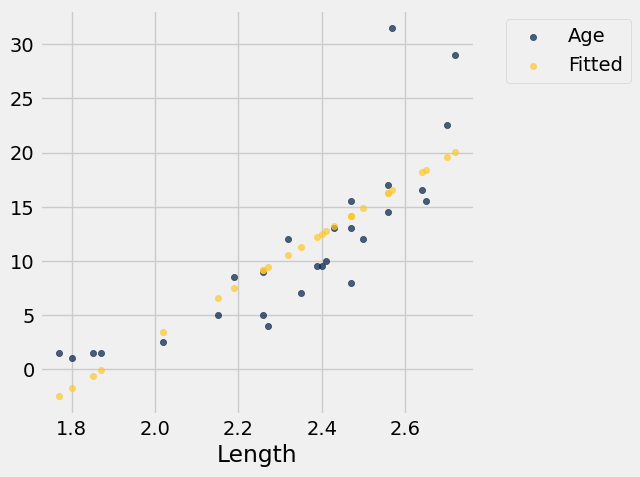

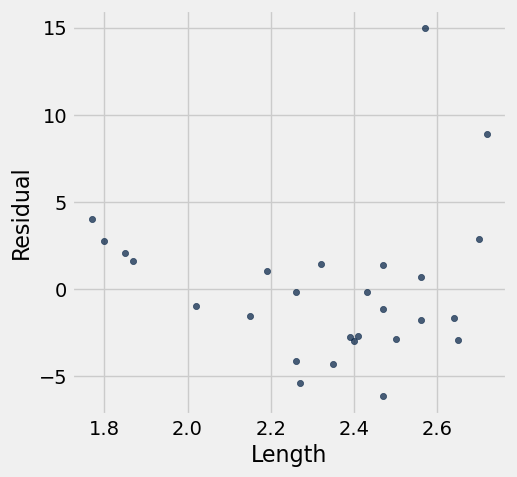

In [13]:
plot_residuals(dugong, 'Length', 'Age')

# US Women

In [14]:
us_women = Table.read_table('us_women.csv')
us_women.show(5)

height,ave weight
58,115
59,117
60,120
61,123
62,126


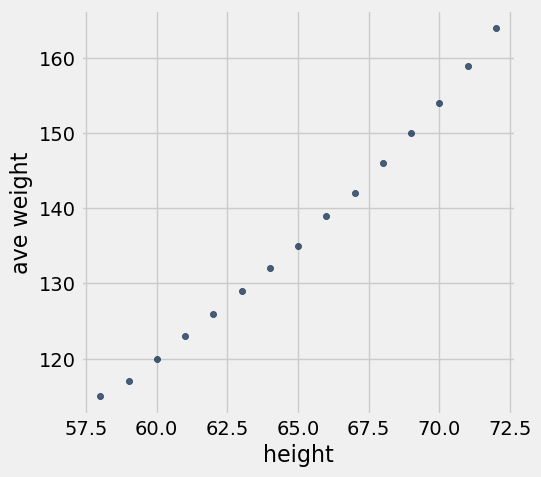

In [15]:
us_women.scatter('height')

In [16]:
correlation(us_women, 'height', 'ave weight')

0.99549476778421608

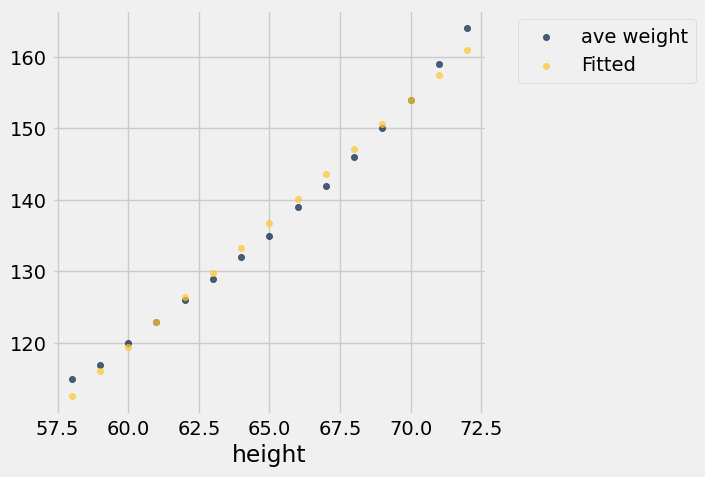

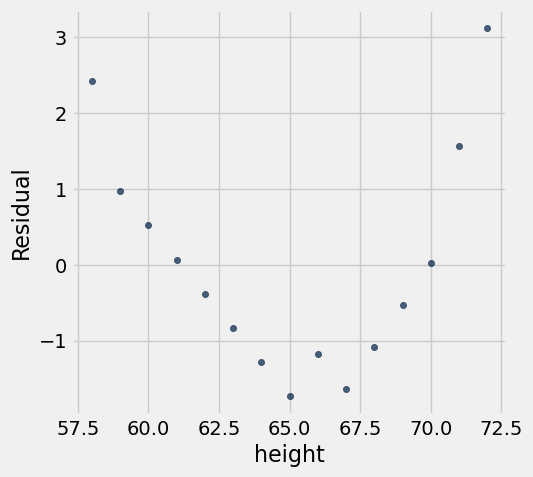

In [17]:
plot_residuals(us_women, 'height', 'ave weight')

## Average of Residuals ##

In [18]:
round(np.average(residuals(dugong, 'Length', 'Age')), 6)

0.0

In [19]:
round(np.average(residuals(heights, 'MidParent', 'Child')), 6)

0.0

In [20]:
round(np.average(residuals(demographics, 'College%', 'Median Income')), 6)

0.0

In [21]:
heights = heights.with_columns(
    'Residual', residuals(heights, 'MidParent', 'Child'),
    'Fitted Value', fitted_values(heights, 'MidParent', 'Child')
)

In [22]:
round(correlation(heights, 'MidParent', 'Residual'), 6)

-0.0

In [23]:
round(correlation(heights, 'Fitted Value', 'Residual'), 6)

-0.0